## Problem Set 3

### Question 1

In [105]:
import pandas as pd
data_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(data_url, sep='|')


users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
# Step 4
# mean age per occupation
users.groupby(['occupation'])[['age']].mean()

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [38]:
# Step 5
users_occupation = pd.pivot_table(users,'user_id','occupation','gender', aggfunc='count').reset_index()
users_occupation['ratio'] = users_occupation['M'] / users_occupation['F']
users_occupation.sort_values(by='ratio', ascending=False)

gender,occupation,F,M,ratio
4,engineer,2.0,65.0,32.500000
19,technician,1.0,26.0,26.000000
15,retired,1.0,13.0,13.000000
14,programmer,6.0,60.0,10.000000
6,executive,3.0,29.0,9.666667
17,scientist,3.0,28.0,9.333333
5,entertainment,2.0,16.0,8.000000
9,lawyer,2.0,10.0,5.000000
16,salesman,3.0,9.0,3.000000
3,educator,26.0,69.0,2.653846


In [23]:
# Step 6
users.groupby('occupation')['age'].agg(['min', 'max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [25]:
# Step 7
users.groupby(['occupation', 'gender'])['age'].mean().to_frame()

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [45]:
# Step 8
users_percentage = pd.pivot_table(users,'user_id','occupation','gender', aggfunc='count').reset_index()
users_percentage['total'] = users_percentage['F'] + users_percentage['M']
users_percentage['M_percentage'] = (users_percentage['M'] / users_percentage['total']) * 100
users_percentage['F_percentage'] = (users_percentage['F'] / users_percentage['total']) * 100
users_percentage = users_percentage[['M_percentage', 'F_percentage']]
users_percentage

gender,M_percentage,F_percentage
0,54.430380,45.569620
1,53.571429,46.428571
2,NaN,NaN
3,72.631579,27.368421
4,97.014925,2.985075
5,88.888889,11.111111
6,90.625000,9.375000
7,31.250000,68.750000
8,14.285714,85.714286
9,83.333333,16.666667


### Question 2

In [47]:
import pandas as pd
data_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(data_url)
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [49]:
#Step 4
euro12[['Goals']]

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [52]:
# Step 5
euro12['Team'].count()

16

In [56]:
# Step 6
len(euro12.columns)

35

In [63]:
# Step 7
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [64]:
# Step 8
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [67]:
# Step 9
discipline.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

In [69]:
#Step 10
more_than_6_goals = euro12[euro12['Goals'] > 6]
more_than_6_goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [73]:
#Step 11
teams_start_with_g = euro12[euro12['Team'].str.startswith('G')]
teams_start_with_g

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [75]:
#Step 12
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [76]:
#Step 13
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [80]:
#Step 14
euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3

In [90]:
import pandas as pd
import numpy as np

series1 = pd.Series(np.random.randint(1, 4, size=100))
series2 = pd.Series(np.random.randint(1, 3, size=100))
series3 = pd.Series(np.random.randint(10000, 30000, size=100))
housing = pd.concat([series1, series2, series3], axis=1)
housing.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
housing




,bedrs,bathrs,price_sqr_meter
0,1,2,26683
1,2,1,22612
2,3,1,12320
3,1,1,27442
4,2,2,21212
...,...,...,...
95,3,1,23901
96,1,2,13847
97,1,1,29675
98,1,1,17269


In [94]:
one_column_dataframe = pd.concat([housing['bedrs'], housing['bathrs'], housing['price_sqr_meter']]).to_frame()
one_column_dataframe.columns = ['bigcolumn']
one_column_dataframe


,bigcolumn
0,1
1,2
2,3
3,1
4,2
...,...
95,23901
96,13847
97,29675
98,17269


In [95]:
#Step 6
one_column_dataframe.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64', length=300)

In [99]:
# Question 3
one_column_dataframe.reset_index(drop=True, inplace=True)
one_column_dataframe.index

RangeIndex(start=0, stop=300, step=1)

## Question 4

In [25]:
import pandas as pd
data = pd.read_csv('wind.txt', delimiter="\s+")
data.head()


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [26]:
# Step 3
format = '%y %m %d'
data['Datetime'] = pd.to_datetime(data['Yr'].astype(str) + ' ' + data['Mo'].astype(str) + ' ' + data['Dy'].astype(str), format=format)
data['Datetime']

0      2061-01-01
1      2061-01-02
2      2061-01-03
3      2061-01-04
4      2061-01-05
          ...    
6569   1978-12-27
6570   1978-12-28
6571   1978-12-29
6572   1978-12-30
6573   1978-12-31
Name: Datetime, Length: 6574, dtype: datetime64[ns]

In [27]:
data['Yr'].unique().tolist()


[61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]

In [28]:
# Step 4 using lamda function
data['Yr'] = data['Yr'].apply(lambda x: x+1900)


In [29]:
# Step 5
format = '%Y %m %d'
data['Datetime'] = pd.to_datetime(data['Yr'].astype(str) + ' ' + data['Mo'].astype(str) + ' ' + data['Dy'].astype(str), format=format)
data = data.set_index(pd.DatetimeIndex(data['Datetime']))
data['Datetime']

Datetime
1961-01-01   1961-01-01
1961-01-02   1961-01-02
1961-01-03   1961-01-03
1961-01-04   1961-01-04
1961-01-05   1961-01-05
                ...    
1978-12-27   1978-12-27
1978-12-28   1978-12-28
1978-12-29   1978-12-29
1978-12-30   1978-12-30
1978-12-31   1978-12-31
Name: Datetime, Length: 6574, dtype: datetime64[ns]

In [30]:
# Step 6
data.isnull().sum(axis=0)

Yr          0
Mo          0
Dy          0
RPT         6
VAL         3
ROS         2
KIL         5
SHA         2
BIR         0
DUB         3
CLA         2
MUL         3
CLO         1
BEL         0
MAL         4
Datetime    0
dtype: int64

In [31]:
#Step 7
data.notnull().sum().sum()


105153

In [32]:
data.dropna(axis=0, inplace=True)

In [33]:
data.columns


Index(['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB',
       'CLA', 'MUL', 'CLO', 'BEL', 'MAL', 'Datetime'],
      dtype='object')

In [34]:
# Step 8
data = data.drop(['Yr', 'Mo', 'Dy', 'Datetime'], axis=1)

In [38]:
data.mean(axis=0).mean()

10.222465245951712

In [41]:
#Step 9
loc_stats = data.agg(['min', 'max', 'mean', 'std'])
loc_stats


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.359979,10.640267,11.656396,6.298587,10.448923,7.085066,9.793006,8.486601,8.490257,8.696705,13.110668,15.603129
std,5.618805,5.268695,5.007805,3.600942,4.933988,3.967735,4.978030,4.498299,4.165947,4.500488,5.829054,6.702178


In [43]:
# Step 10
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis='columns')
day_stats.head()

,min,max,mean,std
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237


In [46]:
# Step 11
january = data[(data.index.month.isin([1])) & (data.index.year.isin([1961, 1962]))]
january.mean()

RPT    14.657193
VAL    12.277719
ROS    12.760000
KIL     7.219649
SHA    11.200175
BIR     8.471053
DUB    12.474561
CLA     9.176140
MUL     9.055789
CLO    10.582632
BEL    14.955614
MAL    15.059474
dtype: float64

In [48]:
# Step 12
data.resample('Y').mean().head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Datetime,,,,,,,,,,,,
1961-12-31,12.207588,10.207206,11.282853,6.846441,10.742735,7.617147,9.633265,8.684912,8.571941,9.700471,13.271559,13.587206
1962-12-31,12.274779,10.150856,11.714365,6.964337,10.692265,7.415331,11.043122,8.829807,8.335552,9.693812,12.985691,14.361436
1963-12-31,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964-12-31,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965-12-31,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644


In [49]:
#Step 13
data.resample('M').mean().head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Datetime,,,,,,,,,,,,
1961-01-31,14.506154,11.225385,12.960385,6.840000,10.509231,8.174231,10.403077,8.670769,8.323462,9.490385,13.270000,14.341538
1961-02-28,16.401923,15.037308,14.470000,9.242692,13.778077,10.884615,11.868077,11.746154,11.748462,12.626538,18.165000,15.300769
1961-03-31,10.660000,11.097407,10.420000,7.100741,10.265556,8.580000,9.108519,9.329259,10.100000,10.989630,16.066296,15.418889
1961-04-30,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05-31,10.024643,8.495714,10.539286,5.992500,9.480357,6.633929,7.645714,8.206786,8.120714,8.534643,11.912143,11.911786


In [50]:
#Step 14
data.resample('W').mean().head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Datetime,,,,,,,,,,,,
1961-01-08,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-22,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-29,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-02-05,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714


In [61]:
weeks = data.resample('W', label='left').mean()
weeks = weeks[:52]
weeks.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Datetime,,,,,,,,,,,,
1961-01-01,12.316000,10.408000,10.050000,5.658000,8.506000,6.242000,10.936000,5.932000,8.150000,8.428000,11.416000,13.226000
1961-01-08,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-15,12.100000,9.500000,11.681667,4.293333,8.966667,6.938333,7.828333,7.291667,5.891667,6.693333,9.993333,10.346667
1961-01-22,19.880000,14.846667,17.548333,11.916667,16.325000,14.016667,14.450000,14.311667,13.316667,14.921667,19.800000,22.388333
1961-01-29,16.827143,15.460000,12.618571,8.247143,13.361429,9.107143,12.204286,8.548571,9.821429,9.460000,14.012857,11.935714


## Question 5

In [87]:
import pandas as pd
data_url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')


In [65]:
# Step 4
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [66]:
# Step 5
len(chipo)

4622

In [67]:
# Step 6
len(chipo.columns)

5

In [68]:
# Step 7
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [69]:
# Step 8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [92]:
# Step 9 and Step 10
most_ordered_item = chipo.groupby('item_name', as_index=False)['quantity'].sum()
most_ordered_item.columns = ['item_name', 'total_orders']
most_ordered_item.sort_values(by='total_orders', ascending=False).head(1)


,item_name,total_orders
17,Chicken Bowl,761


In [94]:
# Step 11 and 12
most_ordered_description = chipo.groupby('choice_description', as_index=False)['quantity'].sum()
most_ordered_description.columns = ['choice_description', 'total_orders']
most_ordered_description.sort_values(by='total_orders', ascending=False).head(1)

,choice_description,total_orders
15,[Diet Coke],159


In [90]:
# Step 13
#chipo['item_price'] = chipo['item_price'].astype(float)
#chipo.dtypes
chipo['item_price'] = chipo['item_price'].astype(str)
chipo['item_price'] = chipo['item_price'].apply(lambda x: x.replace('$', ''))
chipo['item_price'] = chipo['item_price'].astype(float)
chipo.dtypes


order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [95]:
# Step 14
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo['revenue'].sum()

39237.02

In [96]:
# Step 15
chipo['quantity'].sum()

4972

In [97]:
# Step 16
chipo['revenue'].mean()

8.489186499350943

In [100]:
# Step 17
len(chipo['item_name'].unique().tolist())

50

## Question 6


In [101]:
import pandas as pd
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
data.head()


,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


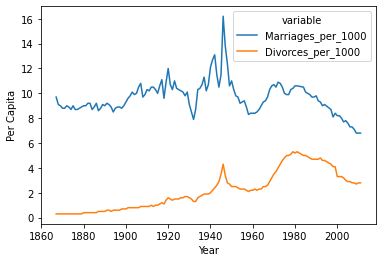

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
marriages_divorces = data[['Year', 'Marriages_per_1000', 'Divorces_per_1000']]
sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(marriages_divorces, ['Year']))
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.show()

## Question 7


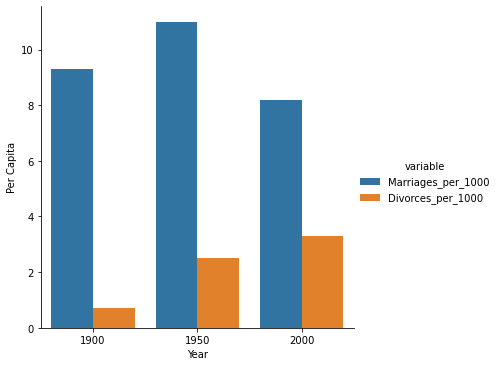

In [118]:
marriages_divorces_bar = marriages_divorces[marriages_divorces['Year'].isin([1900, 1950, 2000])]
marriages_divorces_bar = pd.melt(marriages_divorces_bar, ['Year'])
sns.catplot(x='Year', y='value', hue='variable', kind='bar', data=marriages_divorces_bar)
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.show()


## Question 8


In [119]:
actors = pd.read_csv('actor_kill_counts.csv')
actors.head()


,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239


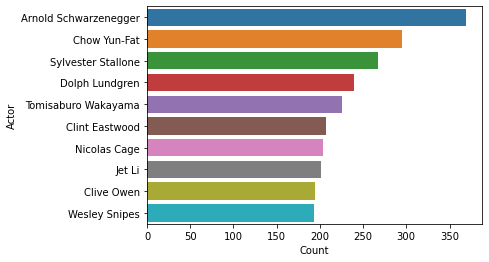

In [125]:
actors = actors.sort_values(by='Count', ascending=False)
sns.barplot(x='Count', y='Actor', data=actors)
plt.show()

## Question 9

In [126]:
roman = pd.read_csv('roman-emperor-reigns.csv')
roman.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


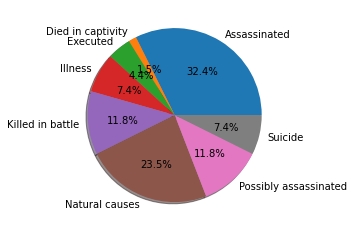

In [141]:
roman_g = roman.groupby('Cause_of_Death')['Emperor'].count()
#roman_g.columns = ['Cause_of_Death', 'TotalCount']
roman_g.plot.pie(y='Emperor', autopct = '%1.1f%%')
plt.ylabel('')
plt.show()

## Question 10

In [142]:
arcades = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcades.head()

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948


In [143]:
arcades.columns

Index(['Year', 'Total Arcade Revenue (billions)',
       'Computer Science Doctorates Awarded (US)'],
      dtype='object')

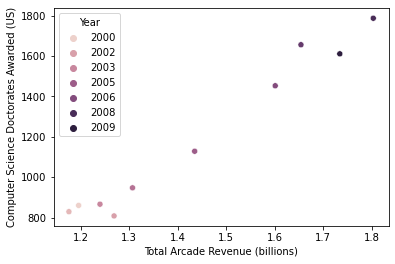

In [145]:
sns.scatterplot(data=arcades, x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year')
plt.show()